In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('glass.xlsx')

In [5]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [9]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


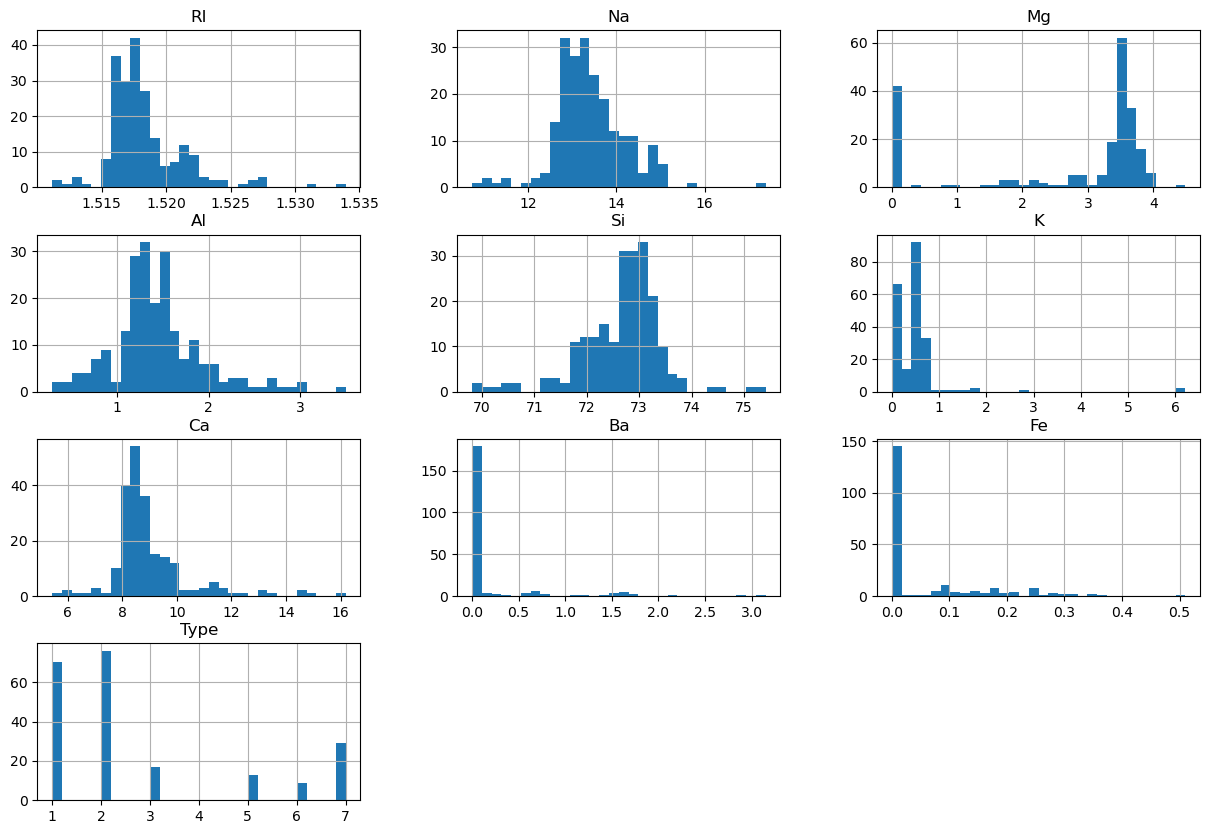

In [12]:
# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [14]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(df=df)
plt.xticks(rotation=90)
plt.show()


C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


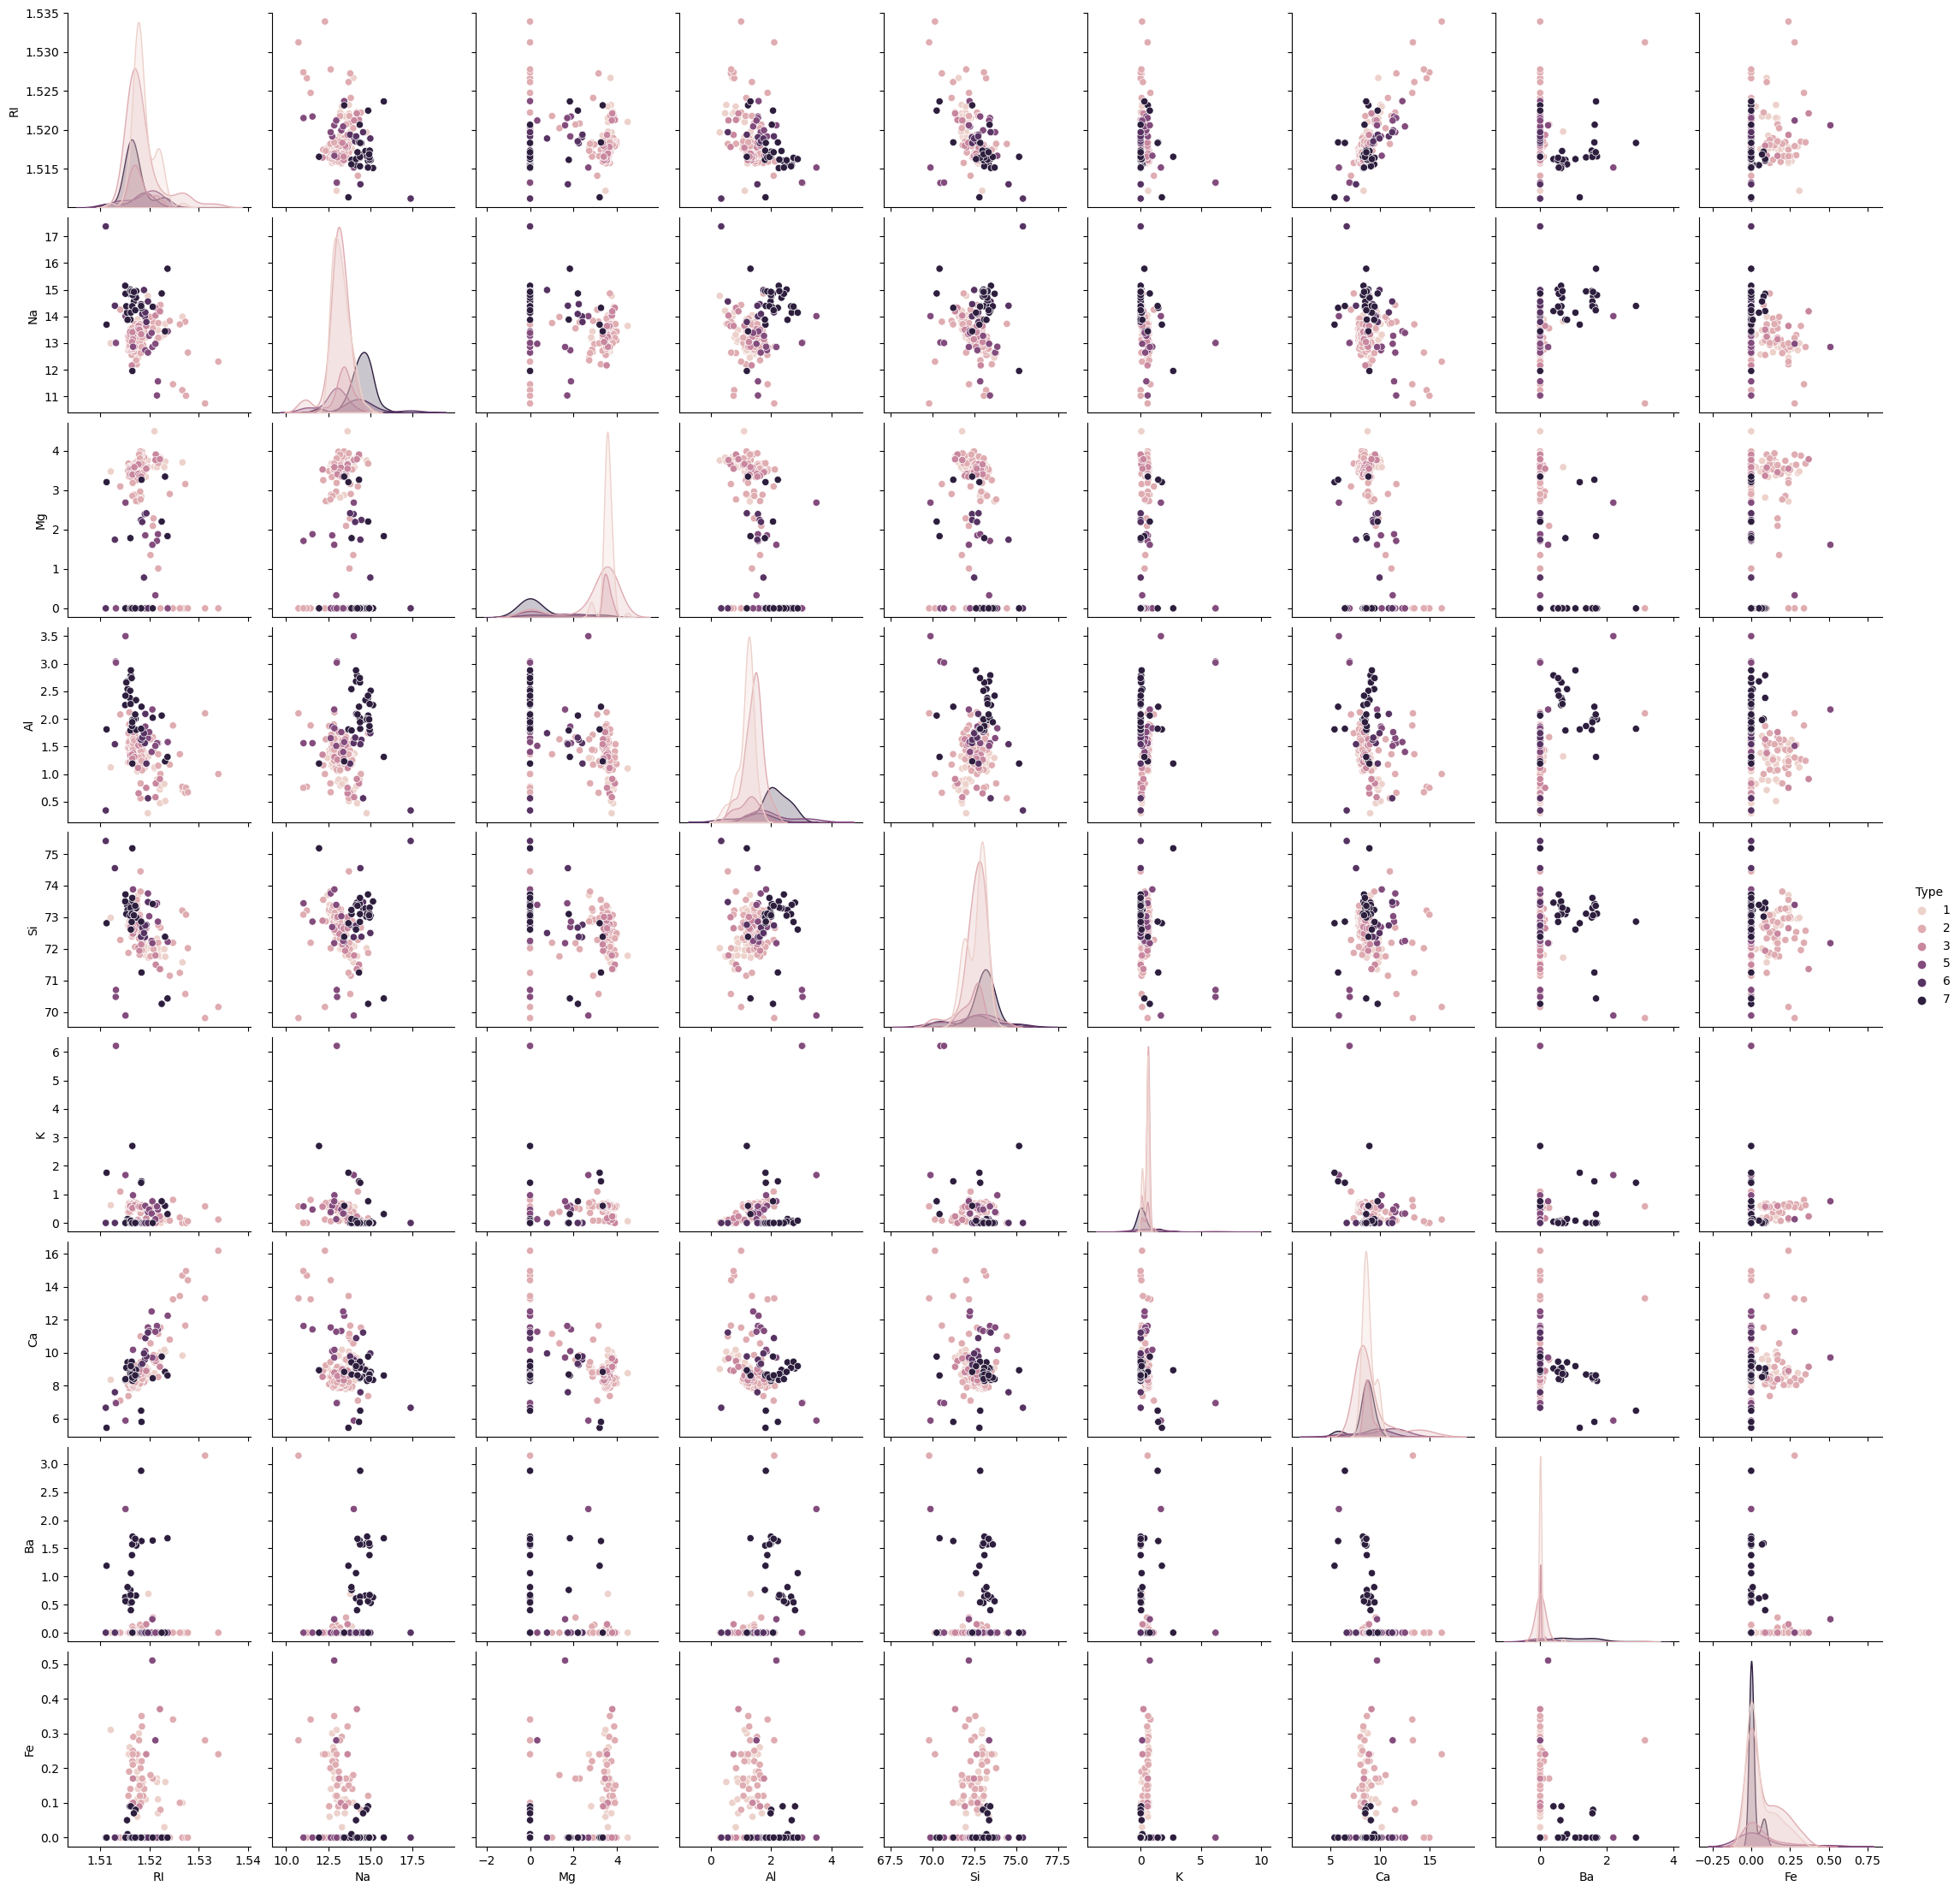

In [16]:
# Pair plots
sns.pairplot(df, hue='Type')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns='Type')
y = df['Type']

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.8372093023255814
Precision: 0.866828165374677
Recall: 0.8372093023255814
F1-score: 0.8330452594474481


In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)


C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [25]:
# Predict on the test set
y_pred_ada = ada.predict(X_test)

In [26]:
# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

print(f'AdaBoost Accuracy: {accuracy_ada}')
print(f'AdaBoost Precision: {precision_ada}')
print(f'AdaBoost Recall: {recall_ada}')
print(f'AdaBoost F1-score: {f1_ada}')

AdaBoost Accuracy: 0.4883720930232558
AdaBoost Precision: 0.48119015047879615
AdaBoost Recall: 0.4883720930232558
AdaBoost F1-score: 0.42529203729503806


C:\Users\vinit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
"""Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating)
 Bagging is an ensemble technique that creates multiple subsets of the training data by randomly sampling 
 with replacement. Each subset is used to train a base model (e.g., decision trees), and the final prediction is 
 obtained by averaging (for regression) or voting (for classification) the predictions of all the base models.
 
 Boosting
Boosting is an ensemble technique that sequentially trains base models, where each new model 
focuses on correcting the errors made by the previous models. The final prediction is obtained by a weighted 
combination of the predictions of all the base models.

Bagging reduces variance and works well with high-variance models by training them in parallel on different 
subsets of data and aggregating their predictions.

Boosting reduces both bias and variance by sequentially training models that correct the errors of their predecessors, 
often leading to better performance but with a higher risk of overfitting if not properly managed."""

In [ ]:
"""Explain how to handle imbalance in the data.
Handling imbalanced data is a common challenge in machine learning, particularly in classification problems 
where one class significantly outnumbers the other(s).
1. Resampling Techniques
    Oversampling the Minority Class
        Increase the number of instances in the minority class by randomly duplicating instances or generating 
        new ones (e.g., using techniques like SMOTE - Synthetic Minority Over-sampling Technique).
    . Undersampling the Majority Class
        Reduce the number of instances in the majority class by randomly removing instances.
    
2. Algorithmic Techniques
    Use Algorithms Designed for Imbalanced Data
        Some algorithms are inherently better at handling imbalanced datasets, such as decision trees, 
        random forests, and ensemble methods like XGBoost and LightGBM.
        
    Adjust Class Weights
        Modify the algorithm to give more importance (weight) to the minority class.
        
3. Evaluation Metrics
     Use Appropriate Metrics
         Accuracy is not a good metric for imbalanced datasets. Instead, use metrics like Precision, Recall, F1-Score, 
         ROC-AUC, and Precision-Recall AUC.
         
4. Data Augmentation
     Synthetic Data Generation
         Generate synthetic data points for the minority class using techniques like SMOTE or ADASYN."""